In [117]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from imblearn.over_sampling import ADASYN, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (  # noqa: F401
    classification_report,
    confusion_matrix,
    roc_auc_score,
    f1_score,
    accuracy_score,
    precision_score,
    recall_score,
)
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [118]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [119]:
from xgboost import XGBClassifier

In [120]:
import numpy as np

!pip install xgboost



In [121]:
%matplotlib inline

pip install -U scikit-learn


pip install -U imbalanced-learn


In [122]:
data = pd.read_csv("/Users/varshith/Projects/1/healthcare.csv")
data

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed_up,Date.diff
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,False,True,0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,False,False,True,0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,False,False,False,False,False,False,True,0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,False,False,True,0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,False,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106982,2.572134e+12,5651768,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,False,False,False,False,False,True,True,35
106983,3.596266e+12,5650093,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,False,False,False,False,False,True,True,35
106984,1.557663e+13,5630692,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,False,False,False,False,False,True,True,41
106985,9.213493e+13,5630323,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,False,False,False,False,False,True,True,41


In [123]:
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed_up,Date.diff
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,False,True,0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,False,False,True,0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,False,False,False,False,False,False,True,0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,False,False,True,0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,False,False,True,0


In [124]:
data.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed_up,Date.diff
106982,2.572134e+12,5651768,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,False,False,False,False,False,True,True,35
106983,3.596266e+12,5650093,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,False,False,False,False,False,True,True,35
106984,1.557663e+13,5630692,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,False,False,False,False,False,True,True,41
106985,9.213493e+13,5630323,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,False,False,False,False,False,True,True,41
106986,3.775115e+14,5629448,F,2016-04-27,2016-06-07,54,MARIA ORTIZ,False,False,False,False,False,True,True,41


In [125]:
data.shape

(106987, 15)

In [126]:
data.size

1604805

In [127]:
data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'Showed_up',
       'Date.diff'],
      dtype='object')

In [128]:
data.copy()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed_up,Date.diff
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,False,True,0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,False,False,True,0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,False,False,False,False,False,False,True,0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,False,False,True,0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,False,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106982,2.572134e+12,5651768,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,False,False,False,False,False,True,True,35
106983,3.596266e+12,5650093,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,False,False,False,False,False,True,True,35
106984,1.557663e+13,5630692,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,False,False,False,False,False,True,True,41
106985,9.213493e+13,5630323,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,False,False,False,False,False,True,True,41


In [129]:
d1 = data.copy()

In [130]:
d1

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed_up,Date.diff
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,False,True,0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,False,False,True,0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,False,False,False,False,False,False,True,0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,False,False,True,0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,False,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106982,2.572134e+12,5651768,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,False,False,False,False,False,True,True,35
106983,3.596266e+12,5650093,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,False,False,False,False,False,True,True,35
106984,1.557663e+13,5630692,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,False,False,False,False,False,True,True,41
106985,9.213493e+13,5630323,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,False,False,False,False,False,True,True,41


In [131]:
data.describe()

,PatientId,AppointmentID,Age,Date.diff
count,1.069870e+05,1.069870e+05,106987.000000,106987.000000
mean,1.472814e+14,5.675434e+06,38.316085,10.166721
std,2.558267e+14,7.133274e+04,22.466214,15.263508
min,3.921784e+04,5.030230e+06,1.000000,-6.000000
25%,4.173523e+12,5.640490e+06,19.000000,0.000000
50%,3.172463e+13,5.680744e+06,38.000000,4.000000
75%,9.433600e+13,5.725634e+06,56.000000,14.000000
max,9.999816e+14,5.790484e+06,115.000000,179.000000


In [132]:
data.describe()

,PatientId,AppointmentID,Age,Date.diff
count,1.069870e+05,1.069870e+05,106987.000000,106987.000000
mean,1.472814e+14,5.675434e+06,38.316085,10.166721
std,2.558267e+14,7.133274e+04,22.466214,15.263508
min,3.921784e+04,5.030230e+06,1.000000,-6.000000
25%,4.173523e+12,5.640490e+06,19.000000,0.000000
50%,3.172463e+13,5.680744e+06,38.000000,4.000000
75%,9.433600e+13,5.725634e+06,56.000000,14.000000
max,9.999816e+14,5.790484e+06,115.000000,179.000000


In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106987 entries, 0 to 106986
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       106987 non-null  float64
 1   AppointmentID   106987 non-null  int64  
 2   Gender          106987 non-null  object 
 3   ScheduledDay    106987 non-null  object 
 4   AppointmentDay  106987 non-null  object 
 5   Age             106987 non-null  int64  
 6   Neighbourhood   106987 non-null  object 
 7   Scholarship     106987 non-null  bool   
 8   Hipertension    106987 non-null  bool   
 9   Diabetes        106987 non-null  bool   
 10  Alcoholism      106987 non-null  bool   
 11  Handcap         106987 non-null  bool   
 12  SMS_received    106987 non-null  bool   
 13  Showed_up       106987 non-null  bool   
 14  Date.diff       106987 non-null  int64  
dtypes: bool(7), float64(1), int64(3), object(4)
memory usage: 7.2+ MB


In [134]:
data.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship          bool
Hipertension         bool
Diabetes             bool
Alcoholism           bool
Handcap              bool
SMS_received         bool
Showed_up            bool
Date.diff           int64
dtype: object

In [135]:
# Checking for the spellings
# Convert Scheduleddat and appointmentday in date and time format
# Data transpose (describe function)

In [136]:
d1.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
Showed_up         0
Date.diff         0
dtype: int64

In [137]:
d1.describe().T

,count,mean,std,min,25%,50%,75%,max
PatientId,106987.0,1.472814e+14,2.558267e+14,3.921784e+04,4.173523e+12,3.172463e+13,9.433600e+13,9.999816e+14
AppointmentID,106987.0,5.675434e+06,7.133274e+04,5.030230e+06,5.640490e+06,5.680744e+06,5.725634e+06,5.790484e+06
Age,106987.0,3.831609e+01,2.246621e+01,1.000000e+00,1.900000e+01,3.800000e+01,5.600000e+01,1.150000e+02
Date.diff,106987.0,1.016672e+01,1.526351e+01,-6.000000e+00,0.000000e+00,4.000000e+00,1.400000e+01,1.790000e+02


In [138]:
d1.value_counts()

PatientId     AppointmentID  Gender  ScheduledDay  AppointmentDay  Age  Neighbourhood      Scholarship  Hipertension  Diabetes  Alcoholism  Handcap  SMS_received  Showed_up  Date.diff
3.921784e+04  5751990        F       2016-05-31    2016-06-03      44   PRAIA DO SUÁ       False        False         False     False       False    False         True       3            1
7.326428e+13  5717151        F       2016-05-19    2016-05-19      16   TABUAZEIRO         True         False         False     False       False    False         True       0            1
7.338586e+13  5761203        F       2016-06-01    2016-06-01      29   PARQUE MOSCOSO     False        False         False     False       False    False         True       0            1
7.338543e+13  5709396        M       2016-05-17    2016-05-17      2    RESISTÊNCIA        False        False         False     False       False    False         True       0            1
7.338255e+13  5758376        F       2016-06-01    2016-06-0

Correcting the name of the column

In [139]:
d1["Hypertension"] = d1.Hipertension
d1["Handicap"] = d1.Handcap

In [140]:
d1.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed_up,Date.diff,Hypertension,Handicap
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,False,True,0,True,False
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,False,False,True,0,False,False
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,False,False,False,False,False,False,True,0,False,False
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,False,False,True,0,False,False
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,False,False,True,0,True,False


In [141]:
d1.drop(columns=["Hipertension", "Handcap"], axis=1, inplace=True)


In [142]:
d1.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Diabetes,Alcoholism,SMS_received,Showed_up,Date.diff,Hypertension,Handicap
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,False,False,False,False,True,0,True,False
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,True,0,False,False
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,False,False,False,False,True,0,False,False
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,True,0,False,False
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,True,False,False,True,0,True,False


In [143]:
columns = list(d1.columns)
columns.remove("Showed_up")
new = columns + ["Showed_up"]
d1 = d1[new]

In [144]:
d1.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Diabetes,Alcoholism,SMS_received,Date.diff,Hypertension,Handicap,Showed_up
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,False,False,False,False,0,True,False,True
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,0,False,False,True
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,False,False,False,False,0,False,False,True
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,0,False,False,True
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,True,False,False,0,True,False,True


converting the datatypes 

In [145]:
d1["ScheduledDay"] = pd.to_datetime(d1["ScheduledDay"], errors="coerce")
d1["AppointmentDay"] = pd.to_datetime(d1["AppointmentDay"], errors="coerce")


In [146]:
d1.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Diabetes,Alcoholism,SMS_received,Date.diff,Hypertension,Handicap,Showed_up
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,False,False,False,False,0,True,False,True
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,0,False,False,True
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,False,False,False,False,0,False,False,True
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,0,False,False,True
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,True,False,False,0,True,False,True


In [147]:
d1 = d1.drop("PatientId", axis=1)

In [148]:
d1.head()

,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Diabetes,Alcoholism,SMS_received,Date.diff,Hypertension,Handicap,Showed_up
0,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,False,False,False,False,0,True,False,True
1,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,0,False,False,True
2,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,False,False,False,False,0,False,False,True
3,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,0,False,False,True
4,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,True,False,False,0,True,False,True


In [149]:
d1 = d1.drop("AppointmentID", axis=1)

In [150]:
d1.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Diabetes,Alcoholism,SMS_received,Date.diff,Hypertension,Handicap,Showed_up
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,False,False,False,False,0,True,False,True
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,0,False,False,True
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,False,False,False,False,0,False,False,True
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,0,False,False,True
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,True,False,False,0,True,False,True


Visualisation

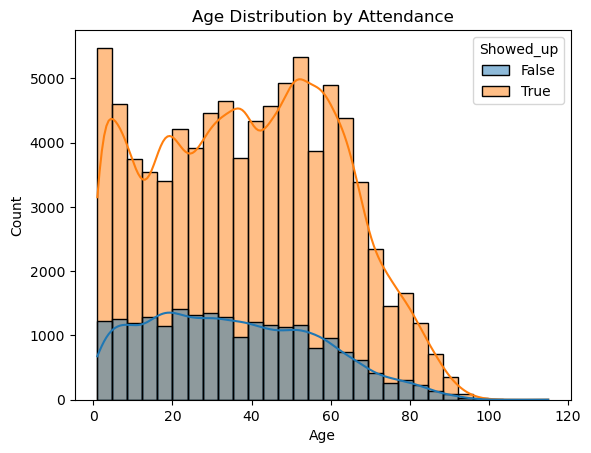

In [151]:
sns.histplot(data=d1, x="Age", hue="Showed_up", kde=True, bins=30)
plt.title("Age Distribution by Attendance")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


Kids and middle aged people tend to go to hospital more than the young aduts and old patients

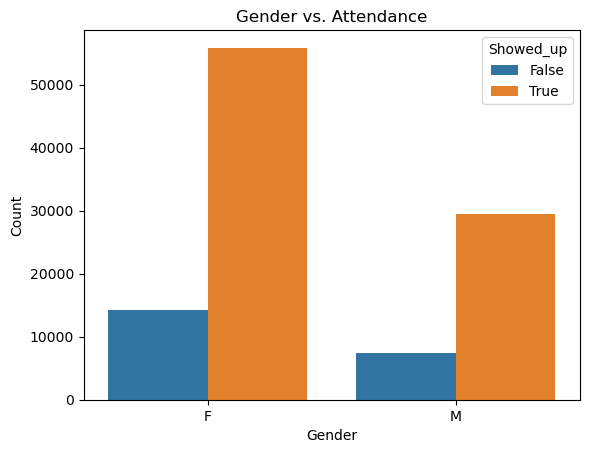

In [152]:
sns.countplot(data=d1, x="Gender", hue="Showed_up")
plt.title("Gender vs. Attendance")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Showed_up")
plt.show()


Female patients are more likely to ateend than the male patients

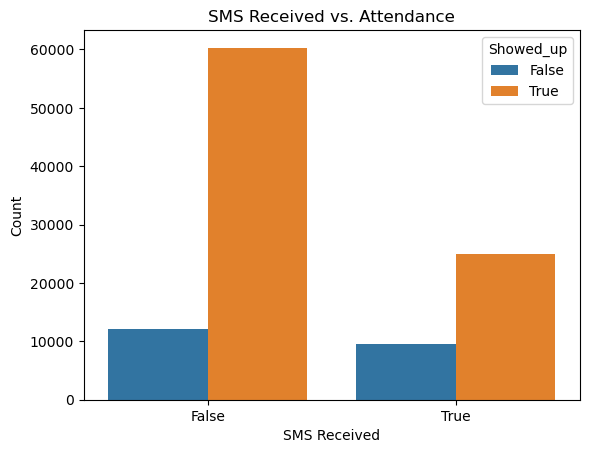

In [153]:
sns.countplot(data=d1, x="SMS_received", hue="Showed_up")
plt.title("SMS Received vs. Attendance")
plt.xlabel("SMS Received")
plt.ylabel("Count")
plt.legend(title="Showed_up")
plt.show()


People who are notfied through SMS are more likely to attend than the ones who are not notified

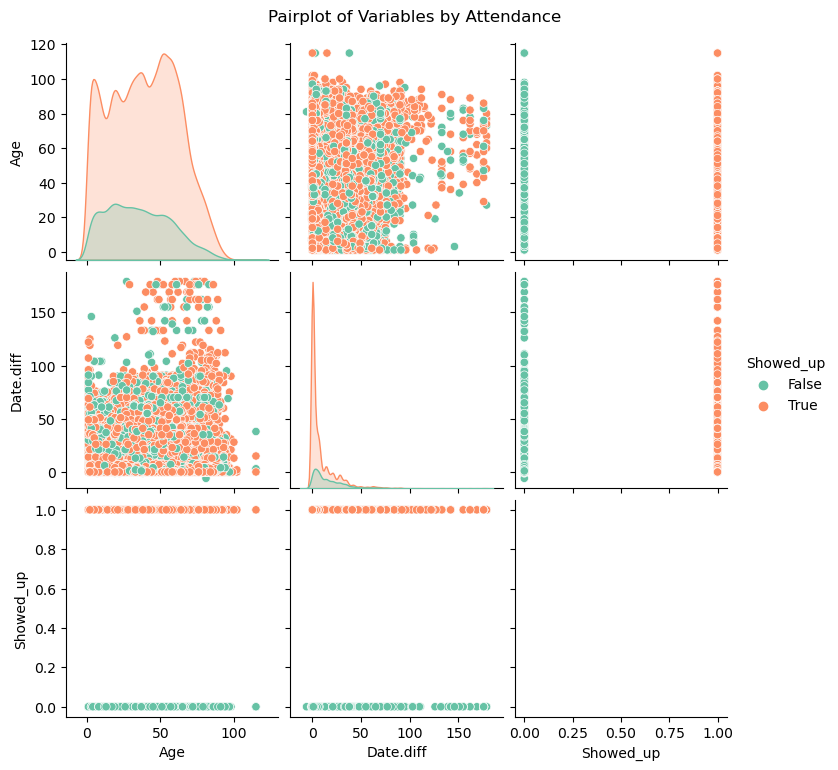

In [154]:
sns.pairplot(
    data=d1,
    hue="Showed_up",
    diag_kind="kde",
    palette="Set2",
    vars=["Age", "Date.diff", "Showed_up"],
)
plt.suptitle("Pairplot of Variables by Attendance", y=1.02)
plt.show()

/var/folders/kk/kf44l5s97jgd4m52pchx1_7m0000gn/T/ipykernel_40508/1437956335.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correlation_data["Showed_up"] = correlation_data["Showed_up"].astype(int)


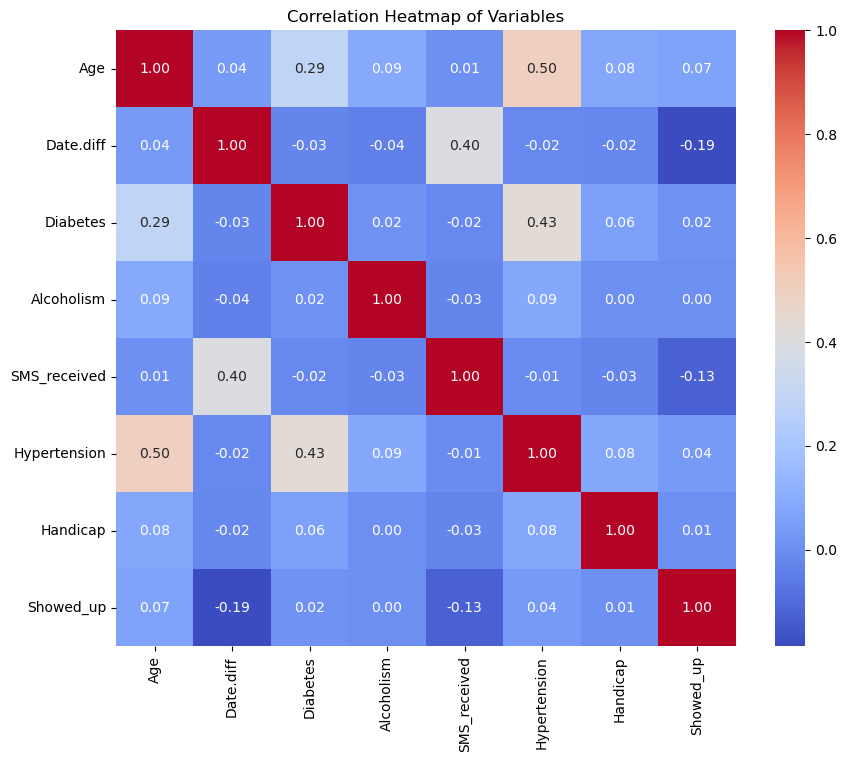

In [155]:
correlation_data = d1[
    [
        "Age",
        "Date.diff",
        "Diabetes",
        "Alcoholism",
        "SMS_received",
        "Hypertension",
        "Handicap",
        "Showed_up",
    ]
]


correlation_data["Showed_up"] = correlation_data["Showed_up"].astype(int)
correlation_matrix = correlation_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Heatmap of Variables")
plt.show()

The heatmap shows weak correlations between the variables and the target variable Showed_up, with Date.diff (-0.19) and SMS_received (-0.13) having the highest absolute correlations. Age and medical conditions like Diabetes and Hypertension show minimal or no relationship with Showed_up.

In [156]:
d1.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Diabetes,Alcoholism,SMS_received,Date.diff,Hypertension,Handicap,Showed_up
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,False,False,False,False,0,True,False,True
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,0,False,False,True
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,False,False,False,False,0,False,False,True
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,0,False,False,True
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,True,False,False,0,True,False,True


In [157]:
d1["Dayofweek"] = d1.AppointmentDay.dt.dayofweek

In [158]:
d1 = pd.get_dummies(d1, columns=["Gender", "Dayofweek"])

In [159]:
d1.head()

,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Diabetes,Alcoholism,SMS_received,Date.diff,Hypertension,Handicap,Showed_up,Gender_F,Gender_M,Dayofweek_0,Dayofweek_1,Dayofweek_2,Dayofweek_3,Dayofweek_4,Dayofweek_5
0,2016-04-29,2016-04-29,62,JARDIM DA PENHA,False,False,False,False,0,True,False,True,1,0,0,0,0,0,1,0
1,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,0,False,False,True,0,1,0,0,0,0,1,0
2,2016-04-29,2016-04-29,62,MATA DA PRAIA,False,False,False,False,0,False,False,True,1,0,0,0,0,0,1,0
3,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,0,False,False,True,1,0,0,0,0,0,1,0
4,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,True,False,False,0,True,False,True,1,0,0,0,0,0,1,0


In [160]:
d1.drop("Neighbourhood", axis=1, inplace=True)

In [161]:
d1.head()

,ScheduledDay,AppointmentDay,Age,Scholarship,Diabetes,Alcoholism,SMS_received,Date.diff,Hypertension,Handicap,Showed_up,Gender_F,Gender_M,Dayofweek_0,Dayofweek_1,Dayofweek_2,Dayofweek_3,Dayofweek_4,Dayofweek_5
0,2016-04-29,2016-04-29,62,False,False,False,False,0,True,False,True,1,0,0,0,0,0,1,0
1,2016-04-29,2016-04-29,56,False,False,False,False,0,False,False,True,0,1,0,0,0,0,1,0
2,2016-04-29,2016-04-29,62,False,False,False,False,0,False,False,True,1,0,0,0,0,0,1,0
3,2016-04-29,2016-04-29,8,False,False,False,False,0,False,False,True,1,0,0,0,0,0,1,0
4,2016-04-29,2016-04-29,56,False,True,False,False,0,True,False,True,1,0,0,0,0,0,1,0


Text(0.5, 0, 'Classes')

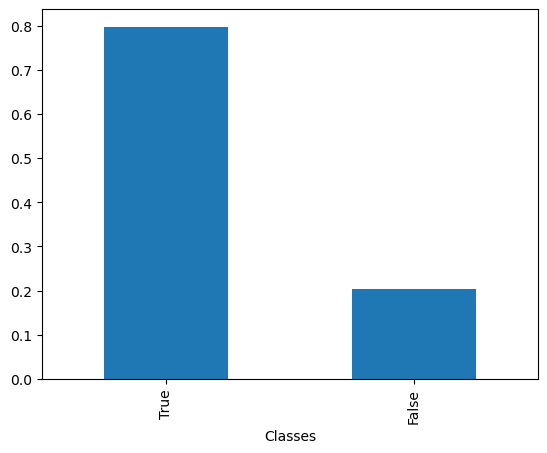

In [162]:
d1.Showed_up.value_counts(normalize=True).plot.bar()
plt.xlabel("Classes")


In [163]:
X = d1.drop("Showed_up", axis=1)
y = d1["Showed_up"]

In [164]:
X = X.drop(columns=["ScheduledDay", "AppointmentDay"])


Splitting the data

In [165]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Oversampling with SMOTE

In [166]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [167]:
y_train_smote.value_counts(normalize=True) * 100

True     50.0
False    50.0
Name: Showed_up, dtype: float64

Oversampling with ADASYN

In [168]:
adasyn = ADASYN(random_state=42)
X_train_ada, y_train_ada = adasyn.fit_resample(X_train, y_train)

In [169]:
y_train_ada.value_counts(normalize=True) * 100

False    51.399027
True     48.600973
Name: Showed_up, dtype: float64

Undersampling the majority class

In [170]:
undersample = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)

In [171]:
y_train_under.value_counts(normalize=True) * 100

False    50.0
True     50.0
Name: Showed_up, dtype: float64

Logistic Regression

In [172]:
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_smote, y_train_smote)

/Users/varshith/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

Prediction on test set

In [173]:
y_pred_model = model.predict(X_test)

In [174]:
print(classification_report(y_test, y_pred_model))

              precision    recall  f1-score   support

       False       0.34      0.39      0.36      4336
        True       0.84      0.80      0.82     17062

    accuracy                           0.72     21398
   macro avg       0.59      0.60      0.59     21398
weighted avg       0.74      0.72      0.73     21398



In [175]:
print(confusion_matrix(y_test, y_pred_model))

[[ 1699  2637]
 [ 3333 13729]]


In [176]:
cm = confusion_matrix(y_test, y_pred_model)

<Axes: >

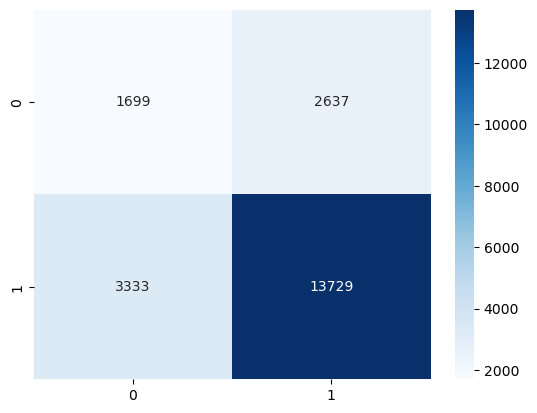

In [177]:
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")

Decision Tree

In [178]:
dt = DecisionTreeClassifier(random_state=42)

In [179]:
dt.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(random_state=42)

In [180]:
y_pred_model_dt = dt.predict(X_test)

In [181]:
print(classification_report(y_test, y_pred_model_dt))

              precision    recall  f1-score   support

       False       0.31      0.46      0.37      4336
        True       0.84      0.74      0.79     17062

    accuracy                           0.68     21398
   macro avg       0.58      0.60      0.58     21398
weighted avg       0.74      0.68      0.70     21398



In [182]:
cm_dt = confusion_matrix(y_test, y_pred_model_dt)
cm_dt

array([[ 2009,  2327],
       [ 4491, 12571]])

Random forest classifier

In [183]:
rfc = RandomForestClassifier(random_state=42)

rfc.fit(X_train_smote, y_train_smote)

Y_pred_rfc = rfc.predict(X_test)


In [184]:
print(classification_report(y_test, Y_pred_rfc))

              precision    recall  f1-score   support

       False       0.31      0.41      0.36      4336
        True       0.84      0.77      0.80     17062

    accuracy                           0.70     21398
   macro avg       0.58      0.59      0.58     21398
weighted avg       0.73      0.70      0.71     21398



In [185]:
cm_rf = confusion_matrix(y_test, Y_pred_rfc)

In [186]:
print(cm_rf)

[[ 1795  2541]
 [ 3933 13129]]


<Axes: >

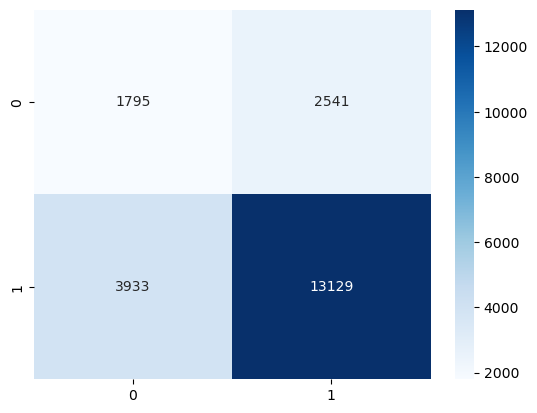

In [187]:
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues")

K-nearest neighbors

In [188]:
knn = KNeighborsClassifier()
knn.fit(X_train_smote, y_train_smote)

y_pred_knn = knn.predict(X_test)

In [189]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

       False       0.30      0.55      0.39      4336
        True       0.86      0.68      0.75     17062

    accuracy                           0.65     21398
   macro avg       0.58      0.61      0.57     21398
weighted avg       0.74      0.65      0.68     21398



In [190]:
cm_knn = confusion_matrix(y_test, y_pred_knn)

<Axes: >

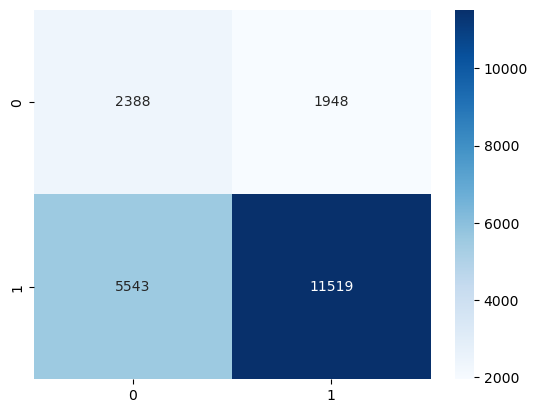

In [191]:
sns.heatmap(cm_knn, cmap="Blues", fmt="d", annot=True)

Naive bayes

In [192]:
nb = GaussianNB()
nb.fit(X_train_smote, y_train_smote)

y_pred_nb = nb.predict(X_test)

In [193]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

       False       0.21      0.81      0.34      4336
        True       0.83      0.24      0.37     17062

    accuracy                           0.36     21398
   macro avg       0.52      0.53      0.36     21398
weighted avg       0.71      0.36      0.37     21398



In [194]:
cm_nb = confusion_matrix(y_test, y_pred_nb)
cm_nb

array([[ 3509,   827],
       [12943,  4119]])

<Axes: >

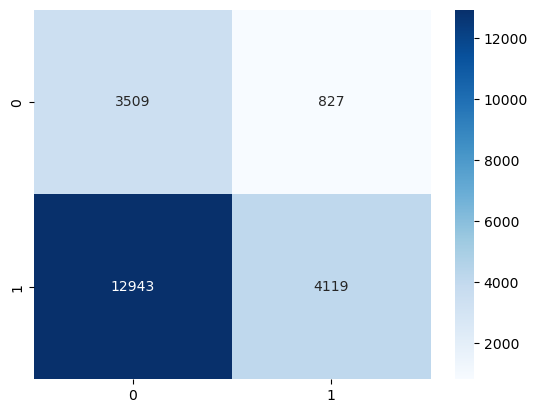

In [195]:
sns.heatmap(cm_nb, cmap="Blues", fmt="d", annot=True)

XGboost

In [196]:
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train_smote, y_train_smote)

y_pred_xgb = xgb.predict(X_test)

In [197]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

       False       0.32      0.56      0.41      4336
        True       0.86      0.70      0.77     17062

    accuracy                           0.67     21398
   macro avg       0.59      0.63      0.59     21398
weighted avg       0.75      0.67      0.70     21398



🔥 Best Model: Logistic Regression (F1-Score: 0.8214)


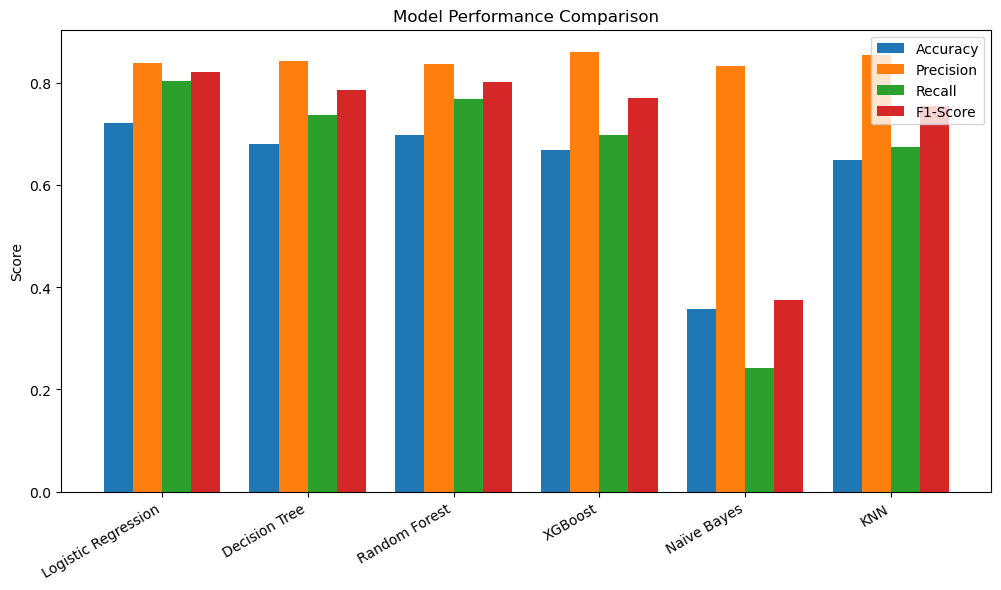

In [198]:
# Dictionary to store model performance
model_performance = {}

# List of trained models
models = {
    "Logistic Regression": model,
    "Decision Tree": dt,
    "Random Forest": rfc,
    "XGBoost": xgb,
    "Naïve Bayes": nb,
    "KNN": knn,
}

# Evaluating each model
for name, model in models.items():
    y_pred = model.predict(X_test)
    model_performance[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
    }

# The best model based on F1-Score
best_model_name = max(model_performance, key=lambda x: model_performance[x]["F1-Score"])
best_model_f1 = model_performance[best_model_name]["F1-Score"]

print(f"🔥 Best Model: {best_model_name} (F1-Score: {best_model_f1:.4f})")

# Convert to a NumPy array for plotting
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
performance_matrix = np.array(
    [[model_performance[m][metric] for metric in metrics] for m in models.keys()]
)

# Plot settings
bar_width = 0.2
x = np.arange(len(models))

# Grouped bar chart
fig, ax = plt.subplots(figsize=(12, 6))
for i, metric in enumerate(metrics):
    ax.bar(x + i * bar_width, performance_matrix[:, i], width=bar_width, label=metric)

# Formatting the plot
ax.set_xticks(x + bar_width * 1.5)
ax.set_xticklabels(models.keys(), rotation=30, ha="right")
ax.set_ylabel("Score")
ax.set_title("Model Performance Comparison")
ax.legend()


plt.show()


In [199]:
import numpy as np


# Function to take user input and make a prediction
def predict_appointment():
    print("\nEnter patient details for prediction:")

    # User inputs
    age = int(input("Enter Age: "))

    # Day of the week input
    day_of_week = (
        input("Enter Day of Appointment (e.g., Monday, Tuesday, etc.): ")
        .strip()
        .capitalize()
    )
    days = [
        "Monday",
        "Tuesday",
        "Wednesday",
        "Thursday",
        "Friday",
        "Saturday",
        "Sunday",
    ]

    if day_of_week not in days:
        print("Invalid day entered. Please enter a valid day.")
        return

    # One-hot encoding for day of the week
    day_encoding = [1 if day_of_week == d else 0 for d in days]

    # Additional features
    scholarship = int(input("Has Scholarship? (1 = Yes, 0 = No): "))
    diabetes = int(input("Has Diabetes? (1 = Yes, 0 = No): "))
    alcoholism = int(input("Has Alcoholism? (1 = Yes, 0 = No): "))
    sms_received = int(input("Received SMS Reminder? (1 = Yes, 0 = No): "))
    hypertension = int(input("Has Hypertension? (1 = Yes, 0 = No): "))
    handicap = int(input("Has Handicap? (1 = Yes, 0 = No): "))

    # Gender input (one-hot encoding)
    gender = input("Enter Gender (M/F): ").strip().upper()
    if gender not in ["M", "F"]:
        print("Invalid gender. Please enter 'M' or 'F'.")
        return

    gender_encoding = [1, 0] if gender == "F" else [0, 1]  # [Gender_F, Gender_M]

    # Input array
    user_input = np.array(
        [age]
        + day_encoding
        + [scholarship, diabetes, alcoholism, sms_received, hypertension, handicap]
        + gender_encoding
    ).reshape(1, -1)

    print(f"User input shape: {user_input.shape}")

    # Prediction
    prediction = rfc.predict(user_input)

    # Result
    if prediction[0] == 1:
        print("\nPrediction: The patient is likely to **show up** for the appointment.")
    else:
        print(
            "\nPrediction: The patient is likely to **miss the appointment** (No-Show)."
        )


predict_appointment()



Enter patient details for prediction:
Invalid gender. Please enter 'M' or 'F'.


In [201]:
import pickle

with open("random_forest.pkl", "wb") as model_file:
    pickle.dump(rfc, model_file)

print("✅ Model saved successfully as 'random_forest.pkl'")


✅ Model saved successfully as 'random_forest.pkl'


In [202]:
pip freeze > requirements.txt 

Note: you may need to restart the kernel to use updated packages.
